<a href="https://colab.research.google.com/github/KenDaupsey/Semi-Parametric-Survival-Analysis-Cox-Proportional-Hazards-Model-for-Unemployment-Duration-Analysis/blob/main/Semi_Parametric_Survival_Analysis_~_Cox_Proportional_Hazards_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Cox Proportional Hazards 2 ***

In [1]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url= "https://raw.githubusercontent.com/KenDaupsey/Semi-Parametric-Survival-Analysis-Cox-Proportional-Hazards-Model-for-Unemployment-Duration-Analysis/main/Survival%7EUnemployment%7EDuration.csv"
df= pd.read_csv(url)
df.head()

,serialno,spell,censor1,censor2,censor3,censor4,age,ui,reprate,disrate,logwage,tenure
0,1,5,1,0,0,0,41,0,0.179,0.045,6.89568,3
1,2,13,1,0,0,0,30,1,0.520,0.130,5.28827,6
2,3,21,1,0,0,0,36,1,0.204,0.051,6.76734,1
3,4,3,1,0,0,0,26,1,0.448,0.112,5.97889,3
4,5,9,0,0,1,0,22,1,0.320,0.080,6.31536,0


In [3]:
df.columns

Index(['serialno', 'spell', 'censor1', 'censor2', 'censor3', 'censor4', 'age',
       'ui', 'reprate', 'disrate', 'logwage', 'tenure'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   serialno  3343 non-null   int64  
 1   spell     3343 non-null   int64  
 2   censor1   3343 non-null   int64  
 3   censor2   3343 non-null   int64  
 4   censor3   3343 non-null   int64  
 5   censor4   3343 non-null   int64  
 6   age       3343 non-null   int64  
 7   ui        3343 non-null   int64  
 8   reprate   3343 non-null   float64
 9   disrate   3343 non-null   float64
 10  logwage   3343 non-null   float64
 11  tenure    3343 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 313.5 KB


In [5]:
df.describe()

,serialno,spell,censor1,censor2,censor3,censor4,age,ui,reprate,disrate,logwage,tenure
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,1672.000000,6.247981,0.320969,0.101406,0.171702,0.375411,35.443314,0.552797,0.454472,0.109438,5.692994,4.114867
std,965.185302,5.611271,0.466919,0.301911,0.377178,0.484301,10.640204,0.497279,0.113792,0.073527,0.535659,5.862322
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.066000,0.002000,2.708050,0.000000
25%,836.500000,2.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.398000,0.052500,5.298320,0.000000
50%,1672.000000,5.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.500000,0.100000,5.676750,2.000000
75%,2507.500000,9.000000,1.000000,0.000000,0.000000,1.000000,43.000000,1.000000,0.520000,0.150000,6.052090,5.000000
max,3343.000000,28.000000,1.000000,1.000000,1.000000,1.000000,61.000000,1.000000,2.059000,1.020000,7.600400,40.000000


In [6]:
# Assuming df is your DataFrame
# Let's first prepare the data
df['spell'] = df['spell'].astype(float)  # Ensure the spell column is of type float

In [7]:
df.dtypes

serialno      int64
spell       float64
censor1       int64
censor2       int64
censor3       int64
censor4       int64
age           int64
ui            int64
reprate     float64
disrate     float64
logwage     float64
tenure        int64
dtype: object

In [8]:
#! pip install lifelines

<lifelines.CoxPHFitter: fitted with 3343 total observations, 2270 right-censored observations>
             duration col = 'spell'
                event col = 'censor1'
      baseline estimation = breslow
   number of observations = 3343
number of events observed = 1073
   partial log-likelihood = -7785.98
         time fit was run = 2024-03-09 07:26:39 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
ui         -1.03       0.36       0.06            -1.16            -0.91                 0.31                 0.40
reprate     1.35       3.86       0.44             0.50             2.21                 1.64                 9.08
disrate    -1.80       0.17       0.50            -2.78            -0.82                 0.06                 0.44
logwage     0.61       1.84       0.09             0.43             0.79                 1.53                 2.21
tenure      0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02

            cmp to      z      p   -log2(p)
covariate                                  
age           0.00  -3.55 <0.005      11.32
ui            0.00 -16.01 <0.005     189.21
reprate       0.00   3.10 <0.005       9.00
disrate       0.00  -3.59 <0.005      11.55
logwage       0.00   6.51 <0.005      33.65
tenure        0.00   1.03   0.30       1.73
---
Concordance = 0.70
Partial AIC = 15583.96
log-likelihood ratio test = 323.67 on 6 df
-log2(p) of ll-ratio test = 219.78

<Figure size 1000x600 with 0 Axes>

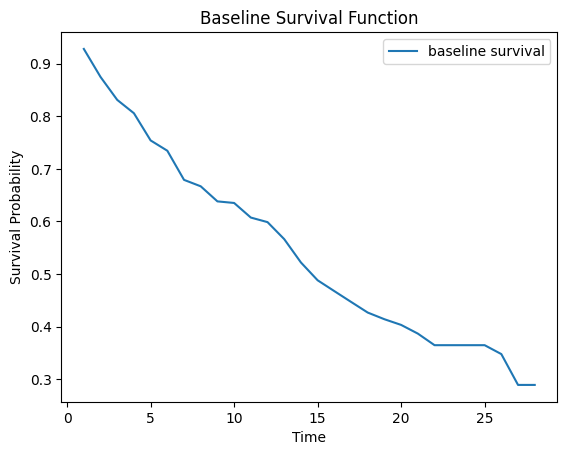

In [9]:
# Model Creation and Results Visualization
from lifelines import CoxPHFitter
cph = CoxPHFitter()

# Selecting the independent variables based on domain knowledge and relevance
independent_variables = ['age', 'ui', 'reprate', 'disrate', 'logwage', 'tenure']

# Fitting the Cox Proportional Hazards model
cph.fit(df, duration_col='spell', event_col='censor1', formula=" + ".join(independent_variables))

# Printing the summary of the model
cph.print_summary()

# Plotting the baseline survival function
plt.figure(figsize=(10, 6))
cph.baseline_survival_.plot()
plt.title('Baseline Survival Function')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

*** The End ***